In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conference =  pd.read_csv('conference.csv')
game_statistics = pd.read_csv('game-statistics.csv')
drive = pd.read_csv('drive.csv')
game = pd.read_csv('game.csv')
kickoff_return = pd.read_csv('kickoff-return.csv')
kickoff = pd.read_csv('kickoff.csv')
ppass = pd.read_csv('pass.csv')
play = pd.read_csv('play.csv')
player_game_statistics = pd.read_csv('player-game-statistics.csv')
player = pd.read_csv('player.csv')
punt_return = pd.read_csv('punt-return.csv')
punt = pd.read_csv('punt.csv')
reception = pd.read_csv('reception.csv')
rush = pd.read_csv('rush.csv')
stadium = pd.read_csv('stadium.csv')
team_game_statistics = pd.read_csv('team-game-statistics.csv')
team = pd.read_csv('team.csv')

In [3]:
#conference_teams = conference_teams.rename(columns = {'Name_x':'Team','Name_y':'Conference'})

'''The dataframe about each play in college football does not contain the date of the game. In order to get the plays seperated
into their appropriate month, I merge the data that does contain this information. I then take the first 2 positions of the
date, seperating by month
'''
frame = pd.merge(play, game, on= 'Game Code')
september_game_codes = frame[frame.Date.str[:2] == '09']['Game Code'].unique()
october_game_codes = frame[frame.Date.str[:2] == '10']['Game Code'].unique()
november_game_codes = frame[frame.Date.str[:2] == '11']['Game Code'].unique()
december_game_codes = frame[frame.Date.str[:2] == '12']['Game Code'].unique()

'''We also need to seperate out the running backs first, and then further seperate out by class standing
'''
rb = player[player.Position == 'RB']
rb_fr = rb[rb.Class == 'FR']['Player Code']
rb_so = rb[rb.Class == 'SO']['Player Code']
rb_jr = rb[rb.Class == 'JR']['Player Code']
rb_sr = rb[rb.Class == 'SR']['Player Code']

merged_team_conference = pd.merge(team, team_game_statistics, on= 'Team Code')

Q 1: How does rate of fumbles by freshman running backs change in comparison to sophomores, juniors and seniors from week to week or month to month. This is almost a proxy question of: do freshmen get “better” more quickly than more seasoned players. I also propose looking at the same trend, but for freshman through senior quarterbacks and their interception rates, but freshman are unlikely to have a starting quarterback position, this insight might yield less dependable results (low population size), but could still be interesting to look at

[Text(0,0.5,'Fumble Rate'), Text(0.5,0,'Month')]

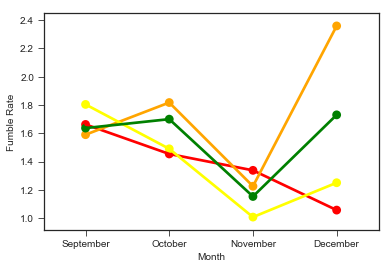

In [4]:
'''I create a new dataframe, allowing us to append the data, giving us easy access to seaborn for plotting the data
'''
df = pd.DataFrame(index = ['September', 'October','November','December'],
                  columns= ['Freshmen', 'Sophmores','Juniors','Seniors','Month'],)

'''We have two dictionaries here, one for the class standings and each of their accompanying filtered dataframe, and 
a dictionary about the month, with the same corresponding data
'''
class_iterator = {'Freshmen':rb_fr, 'Sophmores':rb_so, 'Juniors':rb_jr, 'Seniors':rb_sr}
month_iterator = {'September':september_game_codes,'October':october_game_codes,\
                  'November':november_game_codes,'December':december_game_codes}


'''Now that the data is set up, I can iterate through the dictionary keys, appending the data to the appropriate column
and row. The equation for value asks for all of the plays for a class during a specific month where the play resulted in a
a fumble. This is then divided by the total play count of the class rank in a specific month, giving us the rate in which
a class rank fumbles in a given month. 
'''
for class_standing in class_iterator:
    for month in month_iterator:
        #dicks = ('{} in {}'.format(class_standing, month))
        value =((rush[rush['Player Code'].isin(class_iterator[class_standing]) &
                    rush['Game Code'].isin(month_iterator[month]) &
                    rush['Fumble'] == 1]['Game Code'].count()) / 
              (rush[rush['Player Code'].isin(class_iterator[class_standing]) & 
                    rush['Game Code'].isin(month_iterator[month])]['Game Code'].count()) *100)
        df.at[month,class_standing] = value
        df.at[month,'Month'] = month
df        
sns.set_style("ticks")
ax = sns.pointplot(y="Freshmen", x="Month", data=df, color = 'red')
ax = sns.pointplot(y="Sophmores", x="Month", data=df, color = 'orange')
ax = sns.pointplot(y="Juniors", x="Month", data=df, color = 'yellow')
ax = sns.pointplot(y="Seniors", x="Month", data=df, color = 'green')
ax.set(xlabel='Month', ylabel='Fumble Rate')


From this graph, we see that my initial assumption was not right. I would have assumed that freshmen (red line) in September would have had the highest fumble rate, and then would have had the quickest improvment. This, however, does not appear to be the case. Freshmen start off at about the same fumbel rate as the rest of the classes, and actuall seem to have the slowest rate of improvment. The data presented in December, I believe, is not representative of important information. The games in December are usually only bowl games, so the population size is significantly smaller. 